
<font size='5' color='pink'>加载模块及数据导入</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import *
mpl.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False#用来正常显示负号 上面markdown编辑器中可以通过内置HTML编写代码改变字体颜色大小等属性

In [36]:
mask=pd.read_csv(r'C:\Users\HUAWEI\Desktop\mask.csv',encoding='gbk')#Data source:狗熊会 注意路径
print(mask.loc[770])

名称        自然堂
价格         89
月销量        25
评价数      1321
店铺所在地      安徽
适合肤质     任何肤质
产地         中国
补水保湿        1
美白提亮        1
控油祛痘        0
清洁毛孔        0
提拉紧致        0
Name: 770, dtype: object


In [3]:
mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 12 columns):
名称       794 non-null object
价格       794 non-null float64
月销量      794 non-null int64
评价数      794 non-null int64
店铺所在地    794 non-null object
适合肤质     794 non-null object
产地       794 non-null object
补水保湿     794 non-null int64
美白提亮     794 non-null int64
控油祛痘     794 non-null int64
清洁毛孔     794 non-null int64
提拉紧致     794 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 74.6+ KB


In [4]:
print(mask['产地'].unique())
print(mask['店铺所在地'].unique())#显然“英国” “新加坡”和“海外”有重叠
print(mask['适合肤质'].unique())

['中国' '日本' '韩国' '美国' '英国' '其他/other']
['湖南' '浙江' '英国' '安徽' '广东' '湖北' '江苏' '上海' '江西' '北京' '海外' '天津' '山东' '河南'
 '新加坡' '河北' '辽宁' '四川' '重庆' '福建' '内蒙古' '海南' '云南' '广西' '陕西' '黑龙江']
['任何肤质' '干性肤质' '油性及混合性肤质' '中性及干性肤质' '混合型肤质' '敏感性肤质' '中性肤质' '油性肤质']


In [5]:
mask.loc[mask.店铺所在地=='英国','店铺所在地']='海外'
mask.loc[mask.店铺所在地=='新加坡','店铺所在地']='海外'
mask.loc[mask.产地=='其他/other','产地']='其他'
mask.loc[mask.适合肤质!='任何肤质','适合肤质']='其他'
print(mask['店铺所在地'].unique())

['湖南' '浙江' '海外' '安徽' '广东' '湖北' '江苏' '上海' '江西' '北京' '天津' '山东' '河南' '河北'
 '辽宁' '四川' '重庆' '福建' '内蒙古' '海南' '云南' '广西' '陕西' '黑龙江']


<font size='6' color='orange'>可视化</font>

<font size='5' color='cyan'>调色板</font>

Text(0.5, 0, 'Blues_r')

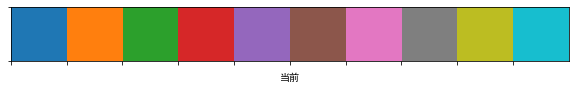

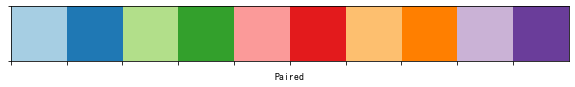

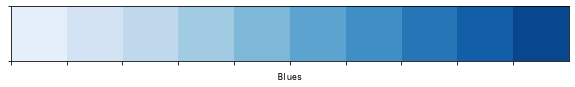

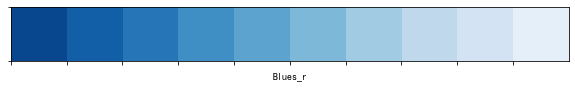

In [6]:
sns.palplot(sns.color_palette())#连续色板 color_palette()能传入任何matplotlib所支持的颜色，不写参数则为默认颜色
plt.xlabel('当前')
sns.palplot(sns.color_palette('Paired',10))
plt.xlabel('Paired')
#渐变色
sns.palplot(sns.color_palette('Blues',n_colors=10))
plt.xlabel('Blues')
sns.palplot(sns.color_palette('Blues_r',10))
plt.xlabel('Blues_r')

<font size='5' color='cyan'>多子图</font>

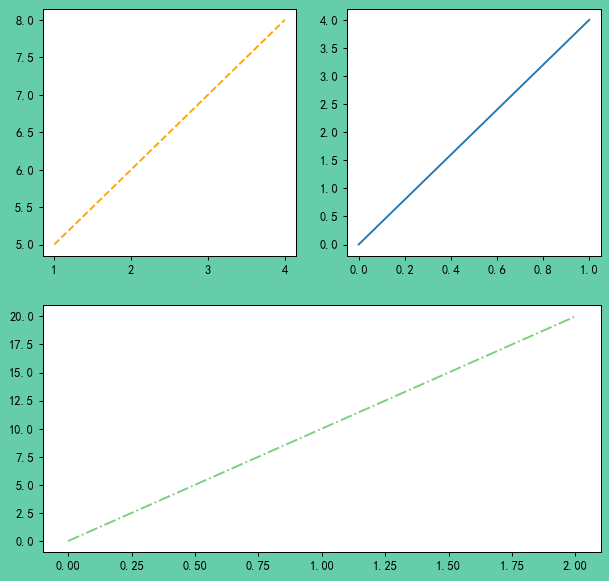

In [7]:
plt.figure(figsize=(8,8),dpi=90,facecolor='#66CDAA')
plt.figure(1)
ax1=plt.subplot(221)
plt.plot([1,2,3,4],[5,6,7,8],color='orange',linestyle='--')
ax2=plt.subplot(222)
plt.plot([0,1],[0,4],linestyle='-')
ax3=plt.subplot(212)
plt.plot([0,2],[0,20],color='#7CCD7C',linestyle='-.')
plt.show()

<font size='5' color='cyan'>双轴</font>

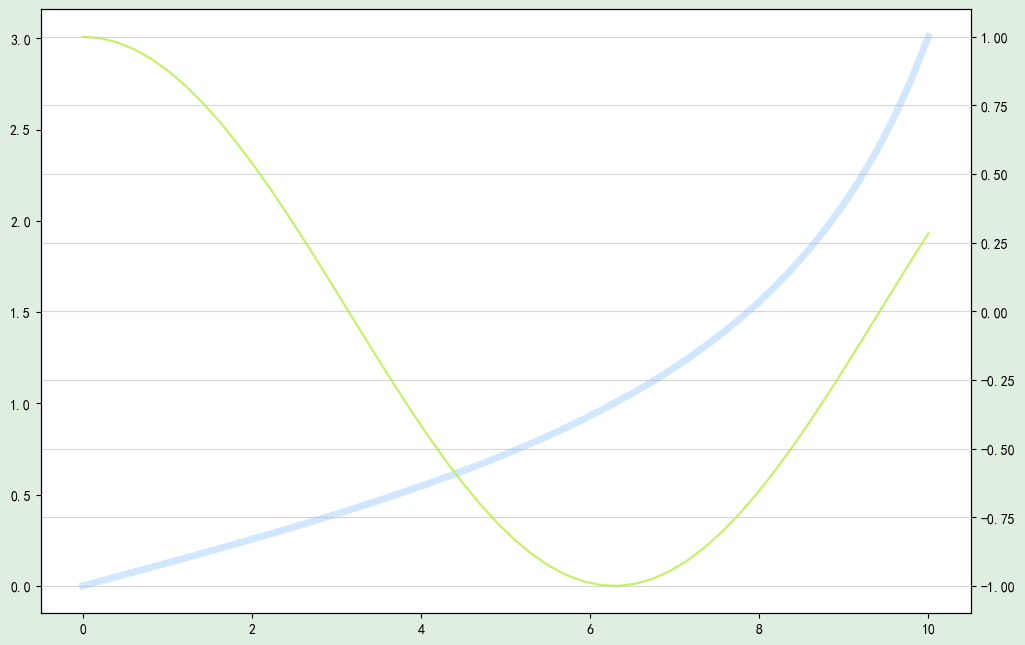

In [8]:
x=np.linspace(0,10)
y1=np.tan(x/8)
y2=np.cos(x/2)
fig,ax1=plt.subplots(figsize=(12,8),dpi=100,facecolor='#E0EEE0')
ax1.plot(x,y1,linewidth='5',color='#C6E2FF',alpha=0.8)
ax2=ax1.twinx()#双轴
ax2.plot(x,y2,color='#B3EE3A',alpha=0.8)
plt.grid(alpha=0.5)

<font size='6' color='cyan'>条形图</font>

<font size='5' color='orange'>seaborn countplot计数条形图</font>

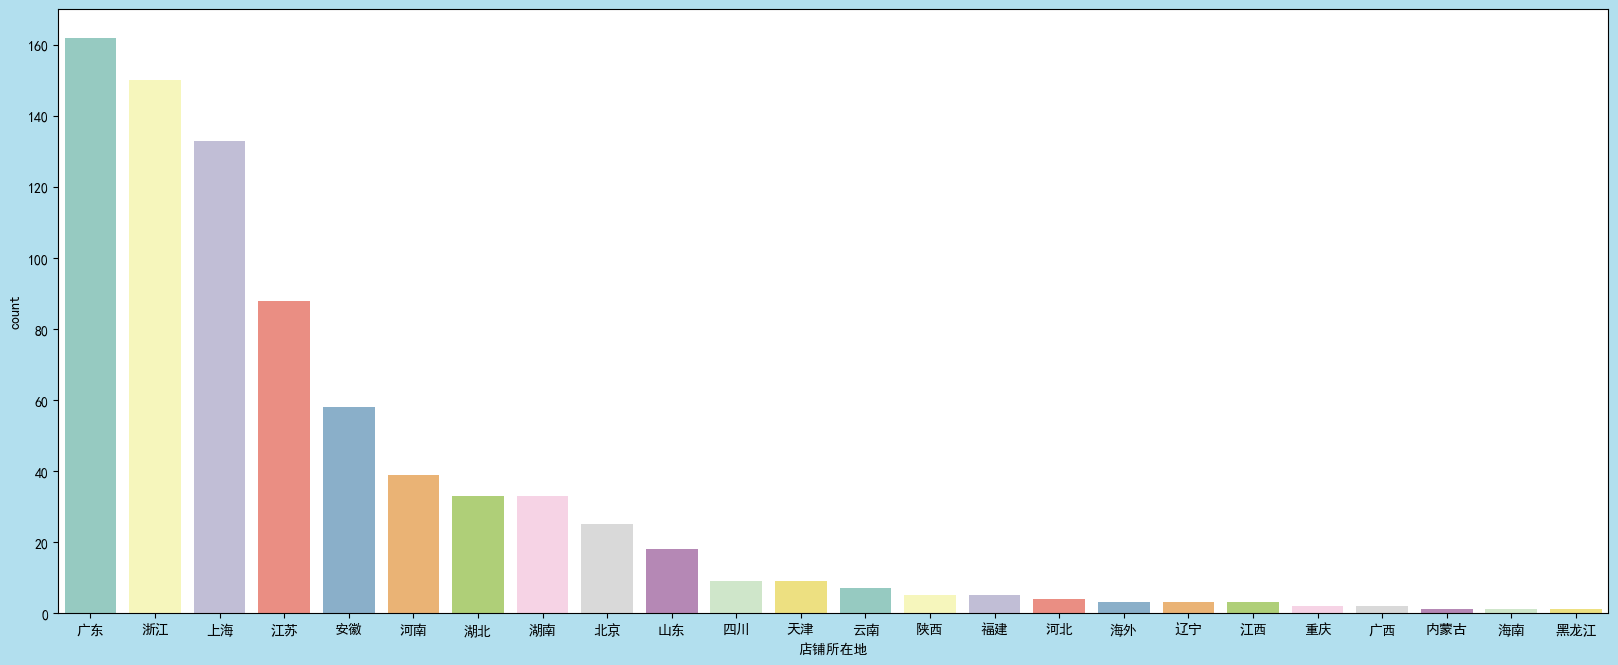

In [9]:
plt.figure(figsize=(20,8),dpi=100,facecolor="#B2DFEE")
sns.countplot('店铺所在地',data=mask,order=mask['店铺所在地'].value_counts().index,palette='Set3')

<font size='5' color='orange'>seaborn barplot</font>

barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000001E8E4BE0268>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)

ci表示置信区间；

estimator = mean表示取各类的均值；median表示取各类的中位数；

指定color来改成单一颜色；palette指定调色板，saturation=0.5改变颜色饱和度；

hue指定分类变量；

order表示x的顺序；hue_order指定hue的顺序；

orient = "h"表示绘制水平horizontal条形图；

errcolor = 'blue',指定误差棒的颜色； errwidth=2,指定误差棒的线宽；capsize = 0.05 指定误差棒两端线条的宽度；

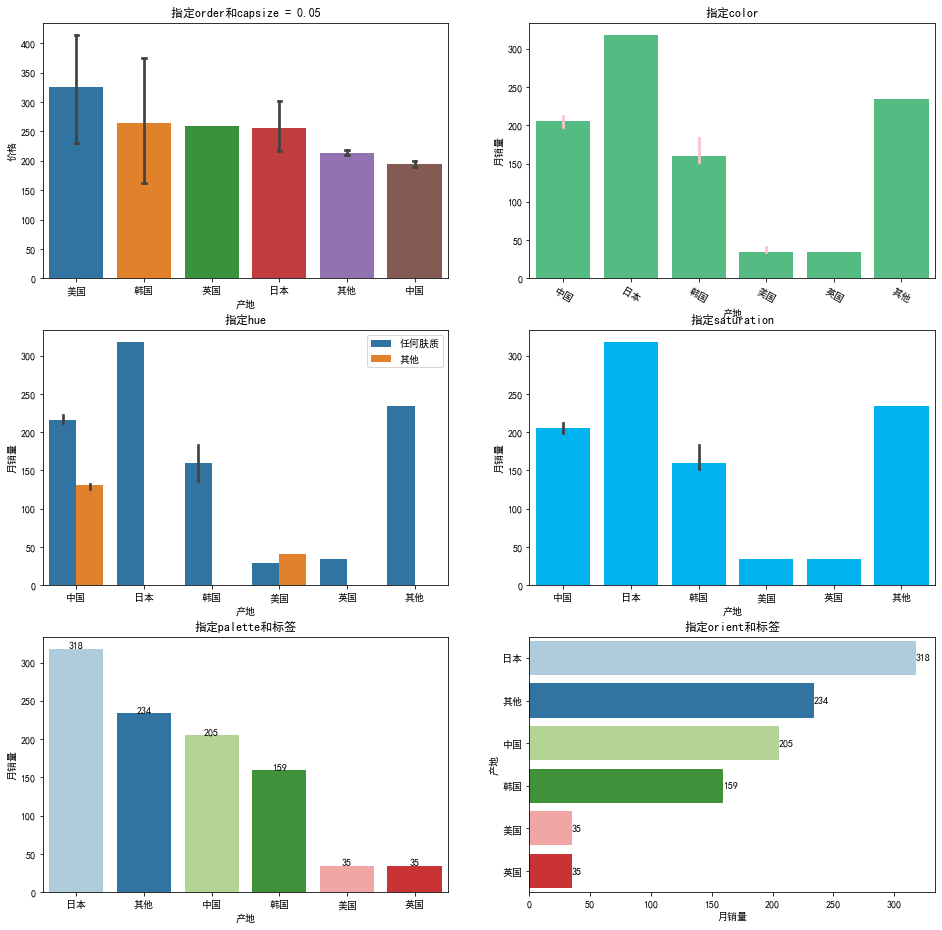

In [10]:
from numpy import median

fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(3,2,1)
sns.barplot(x="产地", y="价格",data=mask, estimator=mean,ci=75,order=['美国', '韩国','英国','日本', '其他','中国'],capsize = 0.05) 
plt.title('指定order和capsize = 0.05')

ax=fig.add_subplot(322)
sns.barplot(x="产地", y="月销量", data=mask, estimator=median,ci=20,color="#43CD80",errcolor='pink')
plt.xticks(rotation=-30)
plt.title('指定color')

ax=fig.add_subplot(323)
sns.barplot(x="产地", y="月销量",hue="适合肤质", data=mask, estimator=median,ci=20)#hue嵌套分组
plt.title('指定hue')
plt.legend(loc='upper right')

ax=fig.add_subplot(324)
sns.barplot(x="产地", y="月销量", data=mask, estimator=median,ci=20,color="#00B2EE",saturation=1.2)
plt.title('指定saturation')

ax=fig.add_subplot(3,2,5)
bardata = mask[['产地','月销量']].groupby(['产地']).median().sort_values(by='月销量',ascending = False).reset_index()#重点！
g = sns.barplot(x="产地", y="月销量",data=bardata, palette="Paired")
for index,row in bardata.iterrows():
    g.text(row.name,row.月销量,int(row.月销量),color="black",ha="center") #ha调整位置
plt.title('指定palette和标签')
#groupby方法操作的是所有操作标签相同的数，将data先按照产地划分，在划分好的子集内再按照月销量划分

ax=fig.add_subplot(3,2,6)
g = sns.barplot(x="月销量", y="产地",data=bardata, palette="Paired",orient = "h")
'''add text to the axes'''
for index,row in bardata.iterrows():
    g.text(row.月销量,row.name,s=int(row.月销量),color="black",va="center") #va调整位置
plt.title('指定orient和标签')##注意改变x和y

#plt.savefig('bar.png',dpi=500)
plt.show()

<font size='5' color='cyan'>plt.bar</font>

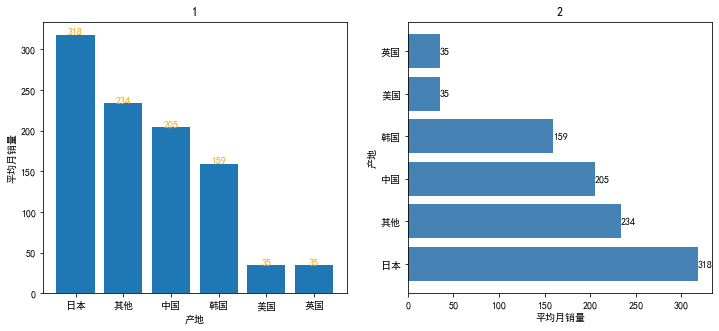

In [11]:
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,2,1)
ax.bar(x=bardata.产地,height=bardata.月销量)
for index,row in bardata.iterrows():
    ax.text(row.name,row.月销量,int(row.月销量),color="orange",ha="center") #ha调整位置
ax.set_title('1')
ax.set_ylabel('平均月销量')
ax.set_xlabel('产地')


ax=fig.add_subplot(1,2,2)
ax.barh(y = bardata.产地,width = bardata.月销量,color = 'steelblue')#水平条形图 
for index,row in bardata.iterrows():
    ax.text(row.月销量,row.name,int(row.月销量),color="black",va="center") #va调整位置
ax.set_title('2')
ax.set_ylabel('产地')
ax.set_xlabel('平均月销量')
plt.show()

<font size='5' color='cyan'>swarmplot</font>

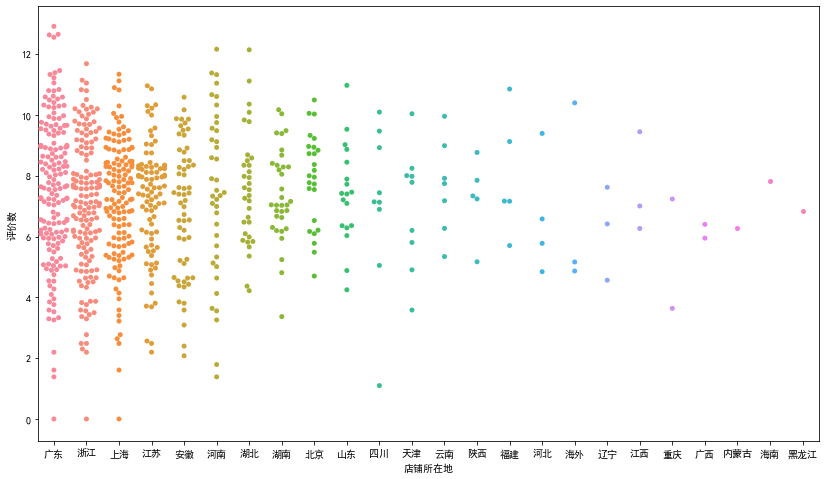

In [12]:
'''美化版小提琴图'''
plt.figure(figsize=(14,8))
sns.swarmplot(x = '店铺所在地', y=log(mask['评价数']), data = mask,order = mask['店铺所在地'].value_counts().index)

<font size='5' color='cyan'>饼图</font>

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)

autopct设置数据标签,控制饼图百分比设置；pctdistance数据标签的距离圆心位置：0~1；
labeldistance: label与圆心距离>1;
explode: 饼与圆心的距离(列表形式)
startangle起始角度；
shadow=True增加阴影，立体效果；

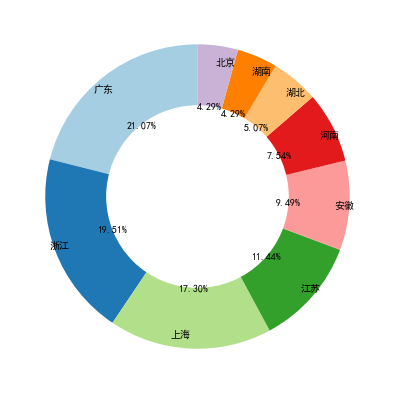

In [13]:
target_list = list(mask['店铺所在地'].value_counts()[9:].index)
pie_list=list(mask['店铺所在地'].value_counts()[:9].index)
mask.loc[mask['店铺所在地'].apply(lambda x: x in target_list),'店铺所在地'] = '其他'


ex = [0.1,0,0.1,0,0,0,0,0,0] #第一个&第三个单独出来，距离圆心0.1
plt.figure(figsize=(7,7))
plt.pie(x=mask['店铺所在地'].value_counts()[:9],labels=pie_list,autopct = '%1.2f%%',startangle=90,colors=sns.color_palette("Paired", 10),labeldistance=0.9)   
plt.pie([1],radius=0.6,colors='w')
#plt.savefig('7店铺所在地饼图.png',dpi=200)
plt.show()


In [14]:
print(mask['店铺所在地'].value_counts())

广东    162
浙江    150
上海    133
江苏     88
其他     73
安徽     58
河南     39
湖南     33
湖北     33
北京     25
Name: 店铺所在地, dtype: int64


<font size='5' color='cyan'>环形图</font>

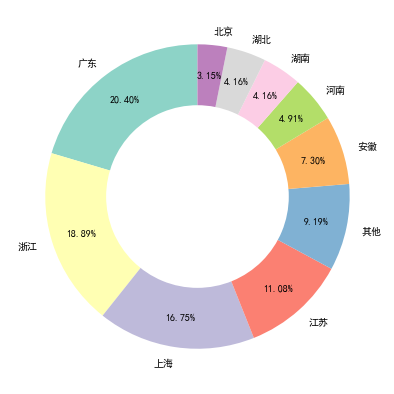

In [15]:
plt.figure(figsize=(7,7))
mask['店铺所在地'].value_counts().plot.pie(autopct = '%1.2f%%',startangle=90,pctdistance=0.8,colors=sns.color_palette("Set3", 10))   
plt.pie([1],radius=0.6,colors='w') #内部白色饼图
plt.ylabel('')
plt.show()

<font size='6' color='green'>分析店铺所在地与价格之间的关系</font>

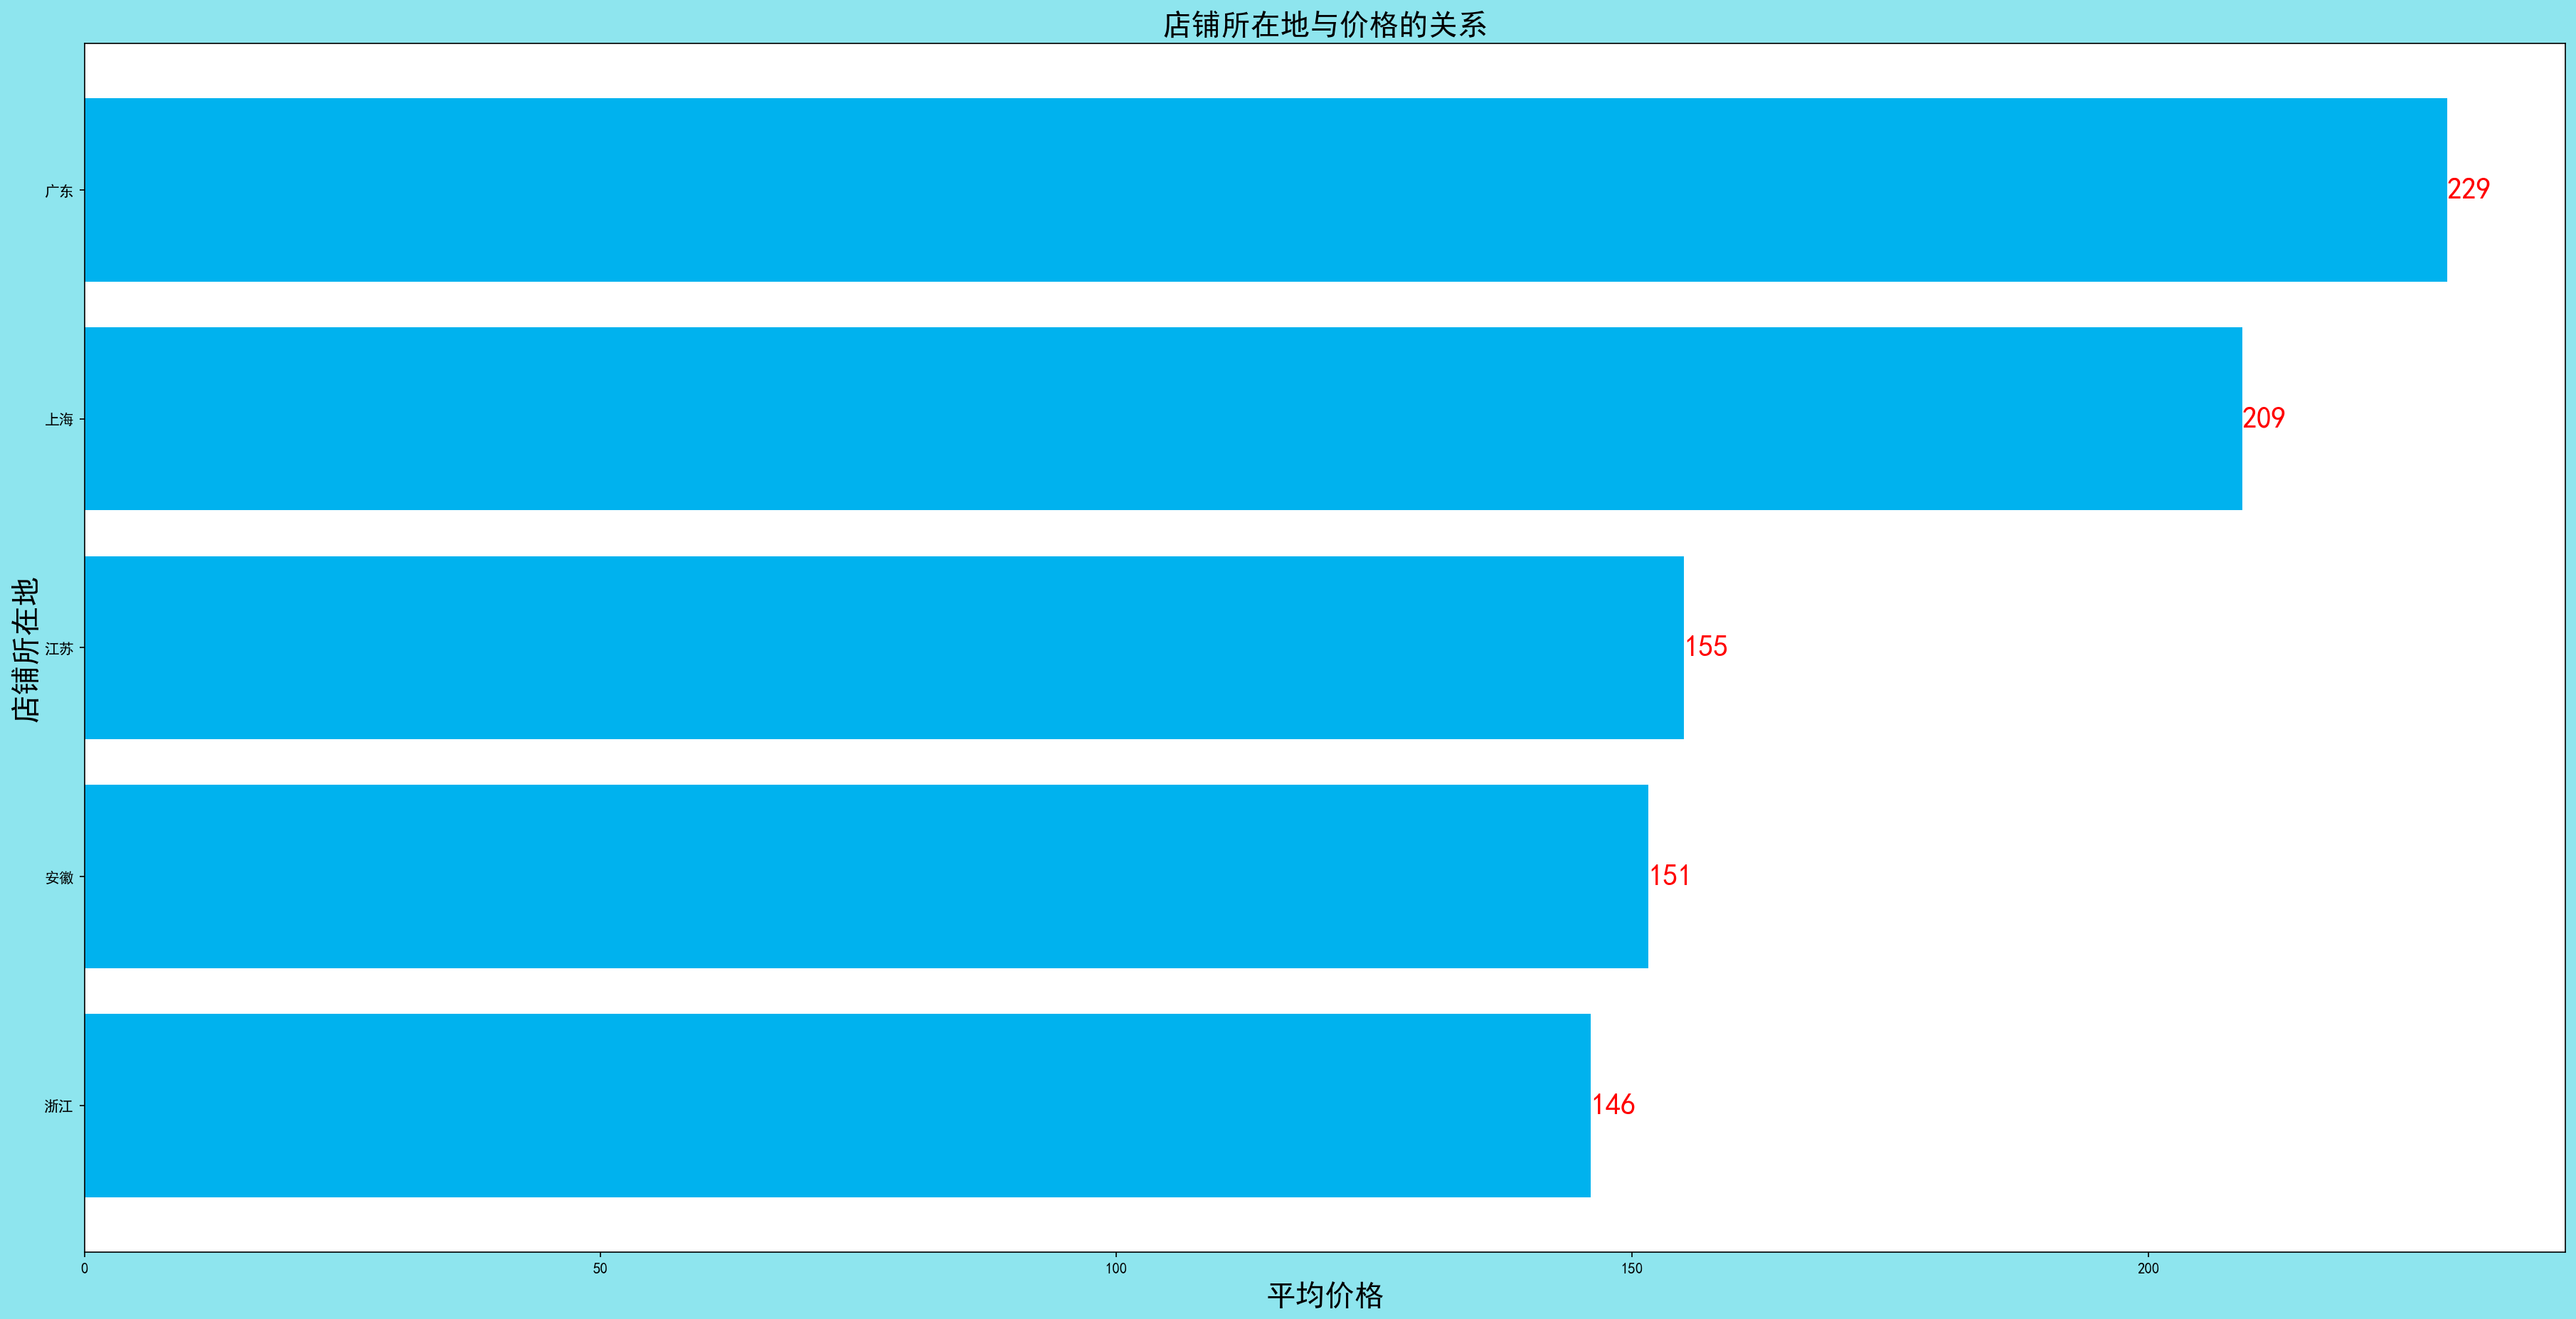

In [29]:
fig=plt.figure(figsize=(30,15),facecolor='#8EE5EE',dpi=150)
ax=fig.add_subplot()
bardata=mask[['店铺所在地','价格']][763:].groupby(['店铺所在地']).mean().sort_values(by='价格',ascending=True).reset_index()
ax.barh(y=bardata.店铺所在地,width=bardata.价格,color='#00B2EE')
for index,row in bardata.iterrows():
    ax.text(row.价格,row.name,int(row.价格),color='red',va='center',fontsize=20)
ax.set_title('店铺所在地与价格的关系',fontsize=20)
ax.set_ylabel('店铺所在地',fontsize=20)
ax.set_xlabel('平均价格',fontsize=20)
plt.show()

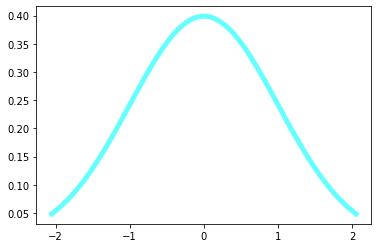

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

r = norm.rvs(loc=0, scale=1, size=1000)

x = np.linspace(norm.ppf(0.02), #ppf stands for percentiles.
                norm.ppf(0.98), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x),
        'cyan', lw=5, alpha=0.6, label='norm pdf')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# create a line chart, years on x-axis, gdp on y-axis
fig = plt.figure()
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
# add a title
plt.title("Nominal GDP")
# add a label to the y-axis
plt.ylabel("Billions of $")